                                       EN2550 - Fundamentals of Image Processing and Machine Vision
                                                         Assignment 2

Index Number : 190280N                    
Name : Jegakumaran P.                
Github Link : 

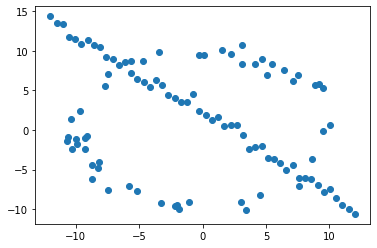

In [2]:
#Question 1
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from skimage.measure import CircleModel, ransac
# np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0,2*np.pi,half_n)
n = s*np.random.randn(half_n)
x , y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m, b = -1,2
x = np.linspace(-12,12,half_n)
y = m*x+b+s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))
fig,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(X, CircleModel, min_samples=2,residual_threshold=1, max_trials=1000)
outliers = inliers == False

# generate coordinates of estimated models
line_x=np.arange(-12,12)
line_y = model.predict_xy(line_x)
line_y_robust = model_robust.predict_xy(X_circ)

fig, ax = plt.subplots()
ax.plot(X[inliers, 0], X[inliers, 1], '.b', alpha=0.6,
        label='Inlier data')
ax.plot(X[outliers, 0], X[outliers, 1], '.r', alpha=0.6,
        label='Outlier data')
#ax.plot(X_circ, line_y, '-k', label='Line model from all data')
#ax.plot(X_circ, line_y_robust, '-b', label='Robust line model')
#ax.legend(loc='lower left')